### <font color=blue >Análise dos dados de acidentes aéreos em todo o mundo entre os anos 1919 e 2022</font>

O dataset foi retirado do Kaggle (www.kaggle.com/datasets/ramjasmaurya/aviation-accidents-history1919-april-2022).
Os dados tem origem no site www.aviation-safety.net.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal

In [2]:
df= pd.read_csv('aviation_accidents in countries - aviation_accidents.csv')
df

,Country,date,Air-craft type,registration name/mark,operator,fatilites,location,category
0,Australia,07-Dec-2016,Boeing 737-8FE (WL),VH-VUP,Virgin Australia Airlines,0,Hobart Airpo...,A2
1,Ukraine,19-Feb-1987,Antonov An-26,NaN,Soviet AF,9,near Stadnitsa,A1
2,Iran,19-Feb-2003,Ilyushin Il-76MD,15-2280,Iranian Revolutionary Guard,275,near Kerman,A1
3,Germany,11-May-1990,Transall C-160D,50+39,German AF,10,near Rodenbach,A1
4,Russia,04-Jan-1943,Junkers Ju-52/3m,NaN,German AF,0,Ostrow,A1
...,...,...,...,...,...,...,...,...
21694,Papua New Guinea,14-Aug-1975,BN-2A Islander,P2-ATX,Aerial Tours,NaN,Naoro Airpor...,A1
21695,USA,28-Jan-1999,Learjet 35,N130F,US Check,0,Chicago-Midw...,A2
21696,Canada,07-Sep-1944,Douglas C-47A (DC-3),43-15745,USAAF,0,near Ottawa-Uplan...,A1
21697,Argentina,31-Aug-1949,Bristol 170 Freighter IA,T-39,Argentine AF,0,"Ituzaingó, BA",A1


In [3]:
df.describe()

,Country,date,Air-craft type,registration name/mark,operator,fatilites,location,category
count,21699,21631,21631,20235,21630,18620,21280,21631
unique,224,14203,3052,19806,5666,359,13371,11
top,USA,10-May-1940,Douglas C-47A (DC-3),LZ-...,USAAF,0,Havana-José ...,A1
freq,4285,93,1707,13,2088,9989,105,15801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21699 entries, 0 to 21698
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 21699 non-null  object
 1   date                    21631 non-null  object
 2   Air-craft type          21631 non-null  object
 3   registration name/mark  20235 non-null  object
 4   operator                21630 non-null  object
 5   fatilites               18620 non-null  object
 6   location                21280 non-null  object
 7   category                21631 non-null  object
dtypes: object(8)
memory usage: 1.3+ MB


*Verificando quantos elementos nulos há na coluna 'date'*

In [5]:
df.date.isnull().sum()

68

*Criando a coluna 'Date', contendo só os anos dos acidentes. Observe que onde havia um elemento nulo, o mesmo foi substituido pelo número 1000*

In [6]:
lista = []
for i in df.index:
    a = str(df.date[i])[-4:]
    if a.isnumeric() == True:
        a = int(a)
        lista.append(a)
    else:
        a = 1000
        lista.append(a)        
    
df['Date'] = lista[:]

*Realocando a nova coluna criada, substituindo a coluna 'date' antiga*

In [7]:
df = df[['Country', 'Date', 'Air-craft type', 'registration name/mark',
       'operator', 'fatilites', 'location', 'category']]
df

,Country,Date,Air-craft type,registration name/mark,operator,fatilites,location,category
0,Australia,2016,Boeing 737-8FE (WL),VH-VUP,Virgin Australia Airlines,0,Hobart Airpo...,A2
1,Ukraine,1987,Antonov An-26,NaN,Soviet AF,9,near Stadnitsa,A1
2,Iran,2003,Ilyushin Il-76MD,15-2280,Iranian Revolutionary Guard,275,near Kerman,A1
3,Germany,1990,Transall C-160D,50+39,German AF,10,near Rodenbach,A1
4,Russia,1943,Junkers Ju-52/3m,NaN,German AF,0,Ostrow,A1
...,...,...,...,...,...,...,...,...
21694,Papua New Guinea,1975,BN-2A Islander,P2-ATX,Aerial Tours,NaN,Naoro Airpor...,A1
21695,USA,1999,Learjet 35,N130F,US Check,0,Chicago-Midw...,A2
21696,Canada,1944,Douglas C-47A (DC-3),43-15745,USAAF,0,near Ottawa-Uplan...,A1
21697,Argentina,1949,Bristol 170 Freighter IA,T-39,Argentine AF,0,"Ituzaingó, BA",A1


*Selecionando os índices em que a coluna 'Date' contém o elemento 1000 e retirando-os do dataframe*

In [8]:
lista = df[df.Date == 1000]['Date'].index
df = df.drop(lista)

*Verificando quantos elementos nulos há na coluna 'fatilites'*

In [9]:
df[df.fatilites.isnull() == True].shape

(2993, 8)

*Deletando os elementos nulos da coluna 'fatilites'*

In [10]:
df.dropna(subset='fatilites', inplace=True)
df

,Country,Date,Air-craft type,registration name/mark,operator,fatilites,location,category
0,Australia,2016,Boeing 737-8FE (WL),VH-VUP,Virgin Australia Airlines,0,Hobart Airpo...,A2
1,Ukraine,1987,Antonov An-26,NaN,Soviet AF,9,near Stadnitsa,A1
2,Iran,2003,Ilyushin Il-76MD,15-2280,Iranian Revolutionary Guard,275,near Kerman,A1
3,Germany,1990,Transall C-160D,50+39,German AF,10,near Rodenbach,A1
4,Russia,1943,Junkers Ju-52/3m,NaN,German AF,0,Ostrow,A1
...,...,...,...,...,...,...,...,...
21693,USA,1983,BN-2A-8 Islander,N37MN,Munz Northern Airlines,2,"Selawik, AK",A1
21695,USA,1999,Learjet 35,N130F,US Check,0,Chicago-Midw...,A2
21696,Canada,1944,Douglas C-47A (DC-3),43-15745,USAAF,0,near Ottawa-Uplan...,A1
21697,Argentina,1949,Bristol 170 Freighter IA,T-39,Argentine AF,0,"Ituzaingó, BA",A1


*Ordenando as linhas pela coluna Date*

In [11]:
df = df.sort_values('Date')

*Resetando o índice e deletando a coluna index criada no processo*

In [12]:
df.reset_index(inplace=True)
df = df.drop('index', axis=1)
df

,Country,Date,Air-craft type,registration name/mark,operator,fatilites,location,category
0,Italy,1919,Caproni Ca.48,NaN,Caproni,14,Verona,A1
1,United Kingdom,1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,A1
2,Sweden,1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,Östanå,A1
3,South Africa,1920,Handley Page O/7,G-EANV,Handley Page Transport,0,Acadia Sidin...,A1
4,United Kingdom,1920,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,A1
...,...,...,...,...,...,...,...,...
18597,Switzerland,2022,Cessna 208 Caravan I,D-FLIC,"Skydive Costa d'Argento, lsf",1,Säntis Mountain,A1
18598,China,2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou-Xia...,A1
18599,Brazil,2022,Embraer Phenom 100,LV-GQN,Flyzar,0,Angra dos Re...,A2
18600,Iran,2022,Cessna 208B Grand Caravan EX,YV3033,Mahan Air,0,"near Vakilabad, A...",A2


*Ordenando as linhas pela coluna 'fatilites' de forma decrescente*

In [13]:
df.sort_values('fatilites', ascending=False)

,Country,Date,Air-craft type,registration name/mark,operator,fatilites,location,category
7668,Peru,1970,Lockheed L-188A Electra,OB-R-939,LANSA,99+ 2,near Cuzco Airpor...,A1
10127,Russia,1981,Tupolev Tu-154B-2,CCCP-85480,"Aeroflot, Krasnoyarsk",99,Noril'sk Air...,A1
12064,Saudi Arabia,1991,Lockheed C-130H Hercules,469,Saudi AF,98,near Rash Mishab,A1
13063,Russia,1995,Tupolev Tu-154B,RA-85164,Khabarovsk United Air,98,near Grossevichi,A1
16167,Indonesia,2009,Lockheed L-100-30 Hercules,A-1325,Indonesian AF,97+ 2,near Madiun-Iswah...,A1
...,...,...,...,...,...,...,...,...
11126,Argentina,1986,Fokker F-28 Fellowship 1000,LV-LOA,Aerolineas Argentinas,0,Ushuaia-Coma...,A2
3695,Sweden,1951,Douglas C-47A (DC-3),SE-BBM,SAS,0,Stockholm-Br...,A1
11128,India,1986,Airbus A300B2-1C,VT-ELV,Indian Airlines,0,Chennai (Mad...,A1
3694,India,1951,Douglas C-47A (DC-3),VT-CKU,Airways (India),0,Gauhati-Borj...,A1


*Criando uma cópia do dataframe*

In [14]:
df2 = df.copy()

*Somando os valores que estavam divididos na coluna 'fatilites'*

In [15]:
for i in df2.index:
    a = df2.fatilites[i]
    if a.isnumeric() == False:
        a1 = a.split('+')
        a2 = int(a1[0]) + int(a1[1].strip())
        a2 = str(a2)
        df2.replace(a,a2, inplace=True)

df2

,Country,Date,Air-craft type,registration name/mark,operator,fatilites,location,category
0,Italy,1919,Caproni Ca.48,NaN,Caproni,14,Verona,A1
1,United Kingdom,1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,A1
2,Sweden,1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,Östanå,A1
3,South Africa,1920,Handley Page O/7,G-EANV,Handley Page Transport,0,Acadia Sidin...,A1
4,United Kingdom,1920,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,A1
...,...,...,...,...,...,...,...,...
18597,Switzerland,2022,Cessna 208 Caravan I,D-FLIC,"Skydive Costa d'Argento, lsf",1,Säntis Mountain,A1
18598,China,2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou-Xia...,A1
18599,Brazil,2022,Embraer Phenom 100,LV-GQN,Flyzar,0,Angra dos Re...,A2
18600,Iran,2022,Cessna 208B Grand Caravan EX,YV3033,Mahan Air,0,"near Vakilabad, A...",A2


*Verificando o formato dos elementos na coluna 'fatilites'*

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18602 entries, 0 to 18601
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 18602 non-null  object
 1   Date                    18602 non-null  int64 
 2   Air-craft type          18602 non-null  object
 3   registration name/mark  17378 non-null  object
 4   operator                18601 non-null  object
 5   fatilites               18602 non-null  object
 6   location                18500 non-null  object
 7   category                18602 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.1+ MB


*Convertendo os elementos da coluna 'fatilites' em elementos numéricos*

In [17]:
df2['fatilites'] = pd.to_numeric(df2['fatilites'], errors='coerce')

*Ordenando as linhas pela coluna 'fatilites' de forma decrescente*

In [18]:
df2.sort_values('fatilites', ascending=False)

,Country,Date,Air-craft type,registration name/mark,operator,fatilites,location,category
14326,USA,2001,Boeing 767-223ER,N334AA,American Airlines,1692,"New York, NY",H1
14356,USA,2001,Boeing 767-222,N612UA,United Airlines,965,"New York, NY",H1
10867,Japan,1985,Boeing 747SR-46,JA8119,JAL,520,near Ueno Village...,A1
8581,France,1974,DC-10-10,TC-JAV,THY,346,Bois d'Ermen...,A1
13281,India,1996,Boeing 747-168B,HZ-AIH,Saudi Arabian,312,near Charki Dadri,A1
...,...,...,...,...,...,...,...,...
3179,Egypt,1949,Fiat G.212CP,SU-AFX,SAIDE,0,Alexandria A...,A1
3178,United Kingdom,1949,Douglas Dakota IV (DC-3),KJ865,RAF,0,Netheravon R...,A1
10847,USA,1985,Convair CV-990,N712NA,NASA,0,Riverside-Ma...,A1
10849,Congo (former Zaire),1985,SE-210 Caravelle VI-N,9Q-CMD,African Air Charter,0,Mbuji-Mayi A...,A1


*Verificando a quantidade de acidentes resultaram em: 0(nenhum óbito) até 10 óbitos*

In [19]:
lista = []
for i in range(0, 11):
    a = df2[df2.fatilites == i]['fatilites'].count()
    print(f'{i:>2} mortes: {a:>4} acidentes')
    lista.append(a)

print(f'\nTotal: {sum(lista)} acidentes')

 0 mortes: 9971 acidentes
 1 mortes:  999 acidentes
 2 mortes: 1076 acidentes
 3 mortes:  927 acidentes
 4 mortes:  817 acidentes
 5 mortes:  601 acidentes
 6 mortes:  471 acidentes
 7 mortes:  394 acidentes
 8 mortes:  317 acidentes
 9 mortes:  264 acidentes
10 mortes:  213 acidentes

Total: 16050 acidentes


*Criando um dataframe com o número total de óbitos por ano analisado*

In [20]:
dict = {}

for i in range(1919, 2023):
    dict[i] = df2[df2.Date == i]['fatilites'].sum()

serie = pd.Series(dict)
df_year = pd.DataFrame(serie, columns=['fatilites'])
df_year

,fatilites
1919,15
1920,4
1921,2
1922,19
1923,7
...,...
2018,953
2019,432
2020,429
2021,330


*Verificando em quais anos ocorreram mais óbitos*

In [21]:
df_year.sort_values('fatilites', ascending=False).head()

,fatilites
2001,3915
1944,3009
1972,2770
1945,2733
1973,2523


*O gráfico a seguir exibe o número de óbitos por ano analisado*

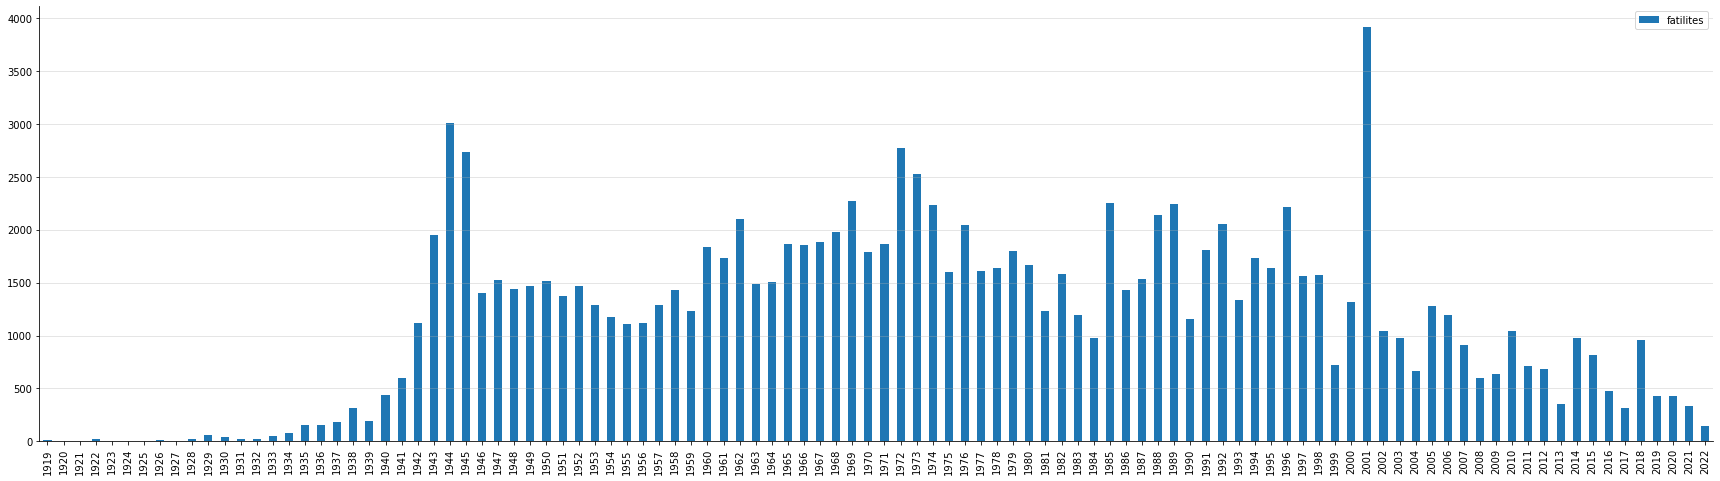

In [22]:
df_year.plot.bar(figsize=(30,8)).grid(axis='y', alpha=0.4)
sns.despine()
plt.show()

*Criando um dataframe com o número total de óbitos por ano analisado em acidentes ocorridos no Brasil*

In [23]:
dict = {}

for i in range(1919, 2023):
    dict[i] = df2[(df2.Country == 'Brazil')&(df2.Date == i)]['fatilites'].sum()
    

serie_br = pd.Series(dict)
df_br_year = pd.DataFrame(serie_br, columns=['fatilites'])
df_br_year

,fatilites
1919,0
1920,0
1921,0
1922,0
1923,0
...,...
2018,4
2019,5
2020,0
2021,8


*O gráfico a seguir exibe o número de óbitos por ano analisado em acidentes no Brasil*

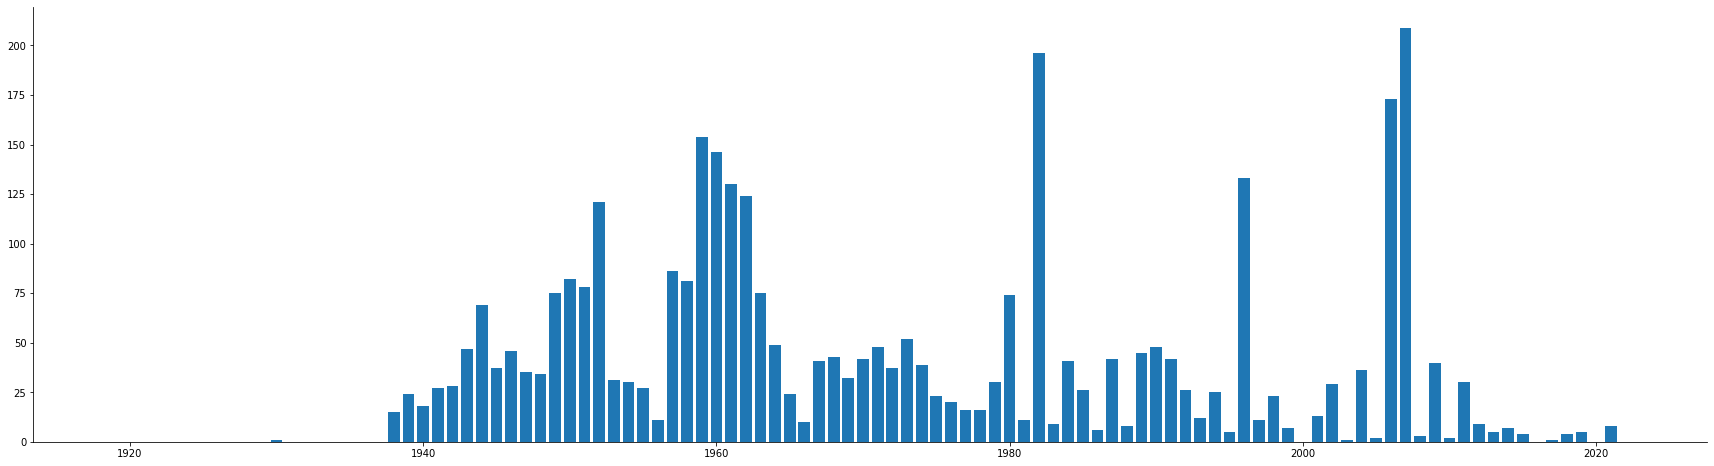

In [24]:
#df_br_year.plot.bar(figsize=(30,8)).grid(axis='y', alpha=0.4)
fig = plt.subplots(figsize=(30,8))
plt.bar(data=df_br_year, height=df_br_year.fatilites, x=df_br_year.index)
sns.despine()
plt.show()

*Descobrindo as médias de óbitos por década, de 1920 a 2020*

In [25]:
print('\033[1mMédia de óbitos por década\033[m\n')
for i in range(1920, 2020, 10):
    print(f'{i} a {i+10}: {round(df_year.loc[i:i+10].values.mean()):>4} óbitos')

#df_year.loc[1980:1990].mean()

Média de óbitos por década

1920 a 1930:   16 óbitos
1930 a 1940:  149 óbitos
1940 a 1950: 1563 óbitos
1950 a 1960: 1348 óbitos
1960 a 1970: 1846 óbitos
1970 a 1980: 1959 óbitos
1980 a 1990: 1582 óbitos
1990 a 2000: 1555 óbitos
2000 a 2010: 1235 óbitos
2010 a 2020:  653 óbitos


*Os gráficos a seguir mostram a quantidade de acidentes com letalidade, por faixa de óbitos. O último gráfico exibe as ocorrências brasileiras.*

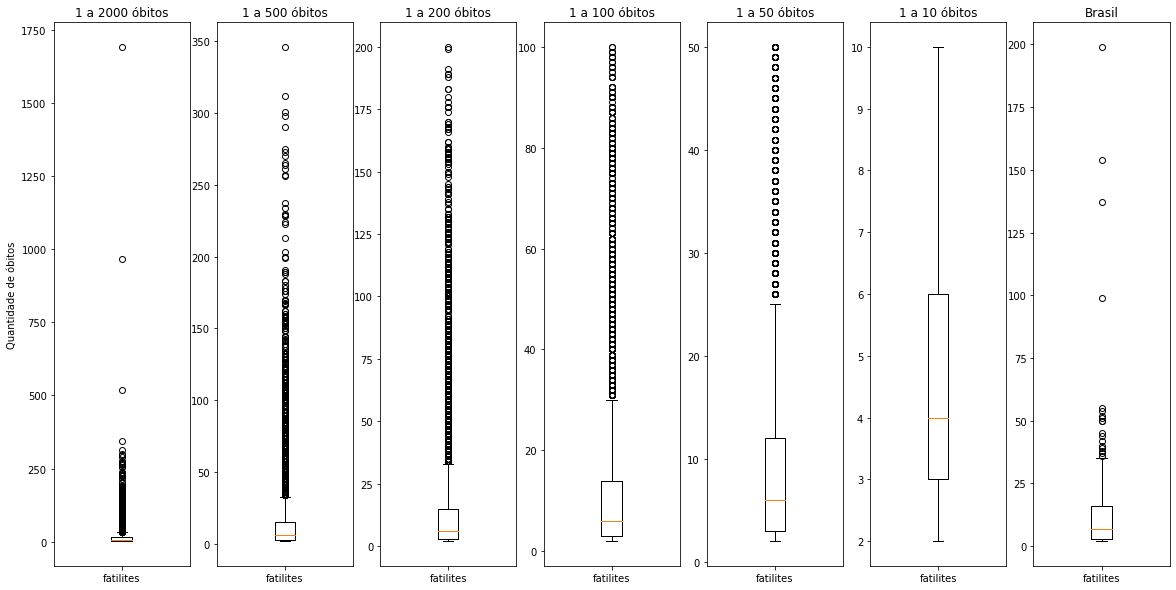

In [26]:
fig, axes = plt.subplots(1, 7, figsize=(20,10))

axes[0].boxplot(df2.fatilites[df2.fatilites > 1],labels=['fatilites'])
axes[0].set_title('1 a 2000 óbitos')
axes[0].set_ylabel('Quantidade de óbitos')

axes[1].boxplot(df2.fatilites[(df2.fatilites > 1)&(df2.fatilites < 500)],labels=['fatilites'])
axes[1].set_title('1 a 500 óbitos')

axes[2].boxplot(df2.fatilites[(df2.fatilites > 1)&(df2.fatilites <= 200)],labels=['fatilites'])
axes[2].set_title('1 a 200 óbitos')

axes[3].boxplot(df2.fatilites[(df2.fatilites > 1)&(df2.fatilites <= 100)],labels=['fatilites'])
axes[3].set_title('1 a 100 óbitos')

axes[4].boxplot(df2.fatilites[(df2.fatilites > 1)&(df2.fatilites <= 50)],labels=['fatilites'])
axes[4].set_title('1 a 50 óbitos')

axes[5].boxplot(df2.fatilites[(df2.fatilites > 1)&(df2.fatilites <= 10)],labels=['fatilites'])
axes[5].set_title('1 a 10 óbitos')

axes[6].boxplot(df2.fatilites[(df2.fatilites > 1)&(df2.Country =='Brazil')],labels=['fatilites'])
axes[6].set_title('Brasil')

plt.show()

*Quantidade de acidentes por faixa de óbitos, de 0 a 1700*

In [27]:
lista = [1700, 1600, 1000, 900, 600, 500, 300, 200, 100, 0]

print('\033[1mACIDENTES AÉREOS COM MORTES ENTRE 1919 E 2022\033[m\n')

for i in lista:
    a = df2.fatilites[(df2.fatilites <= i+100)&(df2.fatilites >= i+1)].count()
    b = round(((a / df2.fatilites.count()) * 100),2)
    if a == 0:
        pass
    else:
        if a == 1:
            print(f' * Entre {i+1:>4} e {i+100:>4} ={a:>5} acidente,  percentual: {b:>5}%')
        else:
            print(f' * Entre {i+1:>4} e {i+100:>4} ={a:>5} acidentes, percentual: {b:>5}%')

print('\n\033[1mACIDENTES AÉREOS SEM MORTESENTRE 1919 E 2022\033[m\n')
print(f' * Sem mortes = {df2.fatilites[df2.fatilites == 0].count()} acidentes, percentual: {round(((df2.fatilites[df2.fatilites == 0].count() / df2.fatilites.count()) * 100),2)}%')

print('\n\033[1mTOTAL DE ACIDENTES AÉREOS ENTRE 1919 E 2022\033[m\n')
print(f' * Total = {df2.fatilites.count()} acidentes')

ACIDENTES AÉREOS COM MORTES ENTRE 1919 E 2022

 * Entre 1601 e 1700 =    1 acidente,  percentual:  0.01%
 * Entre  901 e 1000 =    1 acidente,  percentual:  0.01%
 * Entre  501 e  600 =    1 acidente,  percentual:  0.01%
 * Entre  301 e  400 =    3 acidentes, percentual:  0.02%
 * Entre  201 e  300 =   19 acidentes, percentual:   0.1%
 * Entre  101 e  200 =  147 acidentes, percentual:  0.79%
 * Entre    1 e  100 = 8459 acidentes, percentual: 45.47%

ACIDENTES AÉREOS SEM MORTESENTRE 1919 E 2022

 * Sem mortes = 9971 acidentes, percentual: 53.6%

TOTAL DE ACIDENTES AÉREOS ENTRE 1919 E 2022

 * Total = 18602 acidentes


In [28]:
lista = [1700, 1600, 1000, 900, 600, 500, 300, 200, 100, 0]

print('\033[1mACIDENTES AÉREOS COM MORTES ENTRE 1919 E 2022\033[m\n')

for i in lista:
    a = df2.fatilites[(df2.fatilites <= i+100)&(df2.fatilites >= i+1)].count()
    b = df2.fatilites.count()
    print(f'{a} - {b}')


ACIDENTES AÉREOS COM MORTES ENTRE 1919 E 2022

0 - 18602
1 - 18602
0 - 18602
1 - 18602
0 - 18602
1 - 18602
3 - 18602
19 - 18602
147 - 18602
8459 - 18602


*Quantidade de acidentes por faixa de óbitos, de 0 a 100*

In [29]:
lista = [90, 80, 70, 60, 50, 40, 30, 20, 10, 0]
lista2 = []

print('\033[1mACIDENTES AÉREOS COM ATÉ 100 MORTES ENTRE 1919 E 2022\033[m\n')

for i in lista:
    a = df2.fatilites[(df2.fatilites <= i+10)&(df2.fatilites >= i+1)].count()
    lista2.append(a)
    b = round(((a / df2.fatilites.count()) * 100),2)
    if a == 0:
        pass
    else:
        print(f' * Entre {i+1:>2} e {i+10:>3} ={a:>5} acidentes, percentual: {b:>5}%')

print('\n\033[1mACIDENTES AÉREOS SEM MORTES ENTRE 1919 E 2022\033[m\n')
print(f' * Sem mortes = {df2.fatilites[df2.fatilites == 0].count()} acidentes, percentual: {round(((df2.fatilites[df2.fatilites == 0].count() / df2.fatilites.count()) * 100),2)}%')

print('\n\033[1mTOTAL DE ACIDENTES AÉREOS ENTRE 1919 E 2022\033[m\n')
print(f' * Total = {df2.fatilites.count()} acidentes')

ACIDENTES AÉREOS COM ATÉ 100 MORTES ENTRE 1919 E 2022

 * Entre 91 e 100 =   26 acidentes, percentual:  0.14%
 * Entre 81 e  90 =   47 acidentes, percentual:  0.25%
 * Entre 71 e  80 =   63 acidentes, percentual:  0.34%
 * Entre 61 e  70 =   63 acidentes, percentual:  0.34%
 * Entre 51 e  60 =   99 acidentes, percentual:  0.53%
 * Entre 41 e  50 =  172 acidentes, percentual:  0.92%
 * Entre 31 e  40 =  262 acidentes, percentual:  1.41%
 * Entre 21 e  30 =  529 acidentes, percentual:  2.84%
 * Entre 11 e  20 = 1119 acidentes, percentual:  6.02%
 * Entre  1 e  10 = 6079 acidentes, percentual: 32.68%

ACIDENTES AÉREOS SEM MORTES ENTRE 1919 E 2022

 * Sem mortes = 9971 acidentes, percentual: 53.6%

TOTAL DE ACIDENTES AÉREOS ENTRE 1919 E 2022

 * Total = 18602 acidentes


*Quantidade de acidentes brasileiros por faixa de óbitos, de 0 a 400*

In [30]:
lista = [300, 200, 100, 0]

print('\033[1mACIDENTES AÉREOS BRASILEIROS COM MORTES ENTRE 1919 E 2022\033[m\n')

for i in lista:
    a = df2.fatilites[(df2.Country == 'Brazil')&(df2.fatilites <= i+100)&(df2.fatilites >= i+1)].count()
    b = round(((a / df2.fatilites[df2.Country == 'Brazil'].count()) * 100),2)
    if a == 0:
        pass
    else:
        print(f' * Entre {i+1:>4} e {i+100:>4} ={a:>5} acidentes, percentual: {b:>5}%')

print('\n\033[1mACIDENTES AÉREOS BRASILEIROS SEM MORTES ENTRE 1919 E 2022\033[m\n')
print(f" * Sem mortes = {df2.fatilites[(df2.Country == 'Brazil')&(df2.fatilites == 0)].count()} acidentes, percentual: {round(((df2.fatilites[(df2.Country == 'Brazil')&(df2.fatilites == 0)].count() / df2.fatilites[df2.Country == 'Brazil'].count())*100),2)}%")

print('\n\033[1mTOTAL DE ACIDENTES AÉREOS ENTRE 1919 E 2022\033[m\n')
print(f' * Total = {df2.fatilites[df2.Country == "Brazil"].count()} acidentes')

ACIDENTES AÉREOS BRASILEIROS COM MORTES ENTRE 1919 E 2022

 * Entre  101 e  200 =    3 acidentes, percentual:  0.53%
 * Entre    1 e  100 =  291 acidentes, percentual: 51.23%

ACIDENTES AÉREOS BRASILEIROS SEM MORTES ENTRE 1919 E 2022

 * Sem mortes = 274 acidentes, percentual: 48.24%

TOTAL DE ACIDENTES AÉREOS ENTRE 1919 E 2022

 * Total = 568 acidentes


*Quantidade de acidentes brasileiros por faixa de óbitos, de 0 a 100*

In [31]:
lista = [90, 80, 70, 60, 50, 40, 30, 20, 10, 0]
lista2 = []

print('\033[1mACIDENTES AÉREOS BRASILEIROS COM ATÉ 100 MORTES ENTRE 1919 E 2022\033[m\n')

for i in lista:
    a = df2.fatilites[(df2.Country == 'Brazil')&(df2.fatilites <= i+10)&(df2.fatilites >= i+1)].count()
    lista2.append(a)
    b = round(((a / df2.fatilites[df2.Country == 'Brazil'].count()) * 100),2)
    if a == 0:
        pass
    else:
        if a == 1:
            print(f' * Entre {i+1:>3} e {i+10:>3} ={a:>4} acidente,  percentual: {b:>5}%')
        else:
            print(f' * Entre {i+1:>3} e {i+10:>3} ={a:>4} acidentes, percentual: {b:>5}%')

print('\n\033[1mACIDENTES AÉREOS BRASILEIROS SEM MORTES ENTRE 1919 E 2022\033[m\n')
print(f" * Sem mortes = {df2.fatilites[(df2.Country == 'Brazil')&(df2.fatilites == 0)].count()} acidentes, percentual: {round(((df2.fatilites[(df2.Country == 'Brazil')&(df2.fatilites == 0)].count() / df2.fatilites[df2.Country == 'Brazil'].count())*100),2)}%")

print('\n\033[1mTOTAL DE ACIDENTES AÉREOS ENTRE 1919 E 2022\033[m\n')
print(f' * Total = {df2.fatilites[df2.Country == "Brazil"].count()} acidentes')    

ACIDENTES AÉREOS BRASILEIROS COM ATÉ 100 MORTES ENTRE 1919 E 2022

 * Entre  91 e 100 =   1 acidente,  percentual:  0.18%
 * Entre  51 e  60 =   4 acidentes, percentual:   0.7%
 * Entre  41 e  50 =   5 acidentes, percentual:  0.88%
 * Entre  31 e  40 =   9 acidentes, percentual:  1.58%
 * Entre  21 e  30 =  24 acidentes, percentual:  4.23%
 * Entre  11 e  20 =  50 acidentes, percentual:   8.8%
 * Entre   1 e  10 = 198 acidentes, percentual: 34.86%

ACIDENTES AÉREOS BRASILEIROS SEM MORTES ENTRE 1919 E 2022

 * Sem mortes = 274 acidentes, percentual: 48.24%

TOTAL DE ACIDENTES AÉREOS ENTRE 1919 E 2022

 * Total = 568 acidentes


*Criando um dataframe com o número total de acidentes aéreos, acidentes com óbitos, óbitos totais e percentual, por país*

In [32]:
paises = df2['Country'].value_counts().index
acid_totais = df2['Country'].value_counts().to_list()

series = pd.Series(acid_totais, index=paises)
df_3 = pd.DataFrame(series, columns=['Total de acidentes'])

# Criando 2 novas colunas, uma contendo o número de acidentes e a outra, a quantidade de óbitos totais, dos 10 recordistas
lista = []
for i in paises:
    a = df2[(df2.Country == i)&(df2.fatilites>=1)]['fatilites'].count()
    b = np.sum(df2[df2.Country == i]['fatilites'])
    lista.append([a, b])
    
df_3[['Acidentes com óbitos', 'Total de óbitos']] = lista[:]
lista.clear()

# Criando 2 colunas que informam o percentual de acidentes que resultaram ou não em óbitos do valor total de acidentes dos 10 recordistas
tot_mortos = []
tot_vivos = []
for i in paises:
    a=(df_3.loc[i][1] / df_3.loc[i][0])*100
    tot_mortos.append(round((a),2))    
    b = ((df_3.loc[i][0] - df_3.loc[i][1]) / df_3.loc[i][0])*100
    tot_vivos.append(round((b),2))
    
df_3['Óbitos/Total (%)'] = tot_mortos[:]
df_3['Sem_óbitos/Total (%)'] = tot_vivos[:]
df_3

,Total de acidentes,Acidentes com óbitos,Total de óbitos,Óbitos/Total (%),Sem_óbitos/Total (%)
USA,3889,1728,19270,44.43,55.57
Russia,1285,659,9892,51.28,48.72
Canada,768,269,2351,35.03,64.97
United Kingdom,719,279,2631,38.80,61.20
Brazil,568,294,3525,51.76,48.24
...,...,...,...,...,...
Turks and Caicos Islands,10,3,12,30.00,70.00
Latvia,10,5,55,50.00,50.00
Trinidad and Tobago,9,5,56,55.56,44.44
Mongolia,9,5,118,55.56,44.44


*Gráfico exibe o total de acidentes dos 10 recordistas e quantos destes acidentes tiveram óbitos*

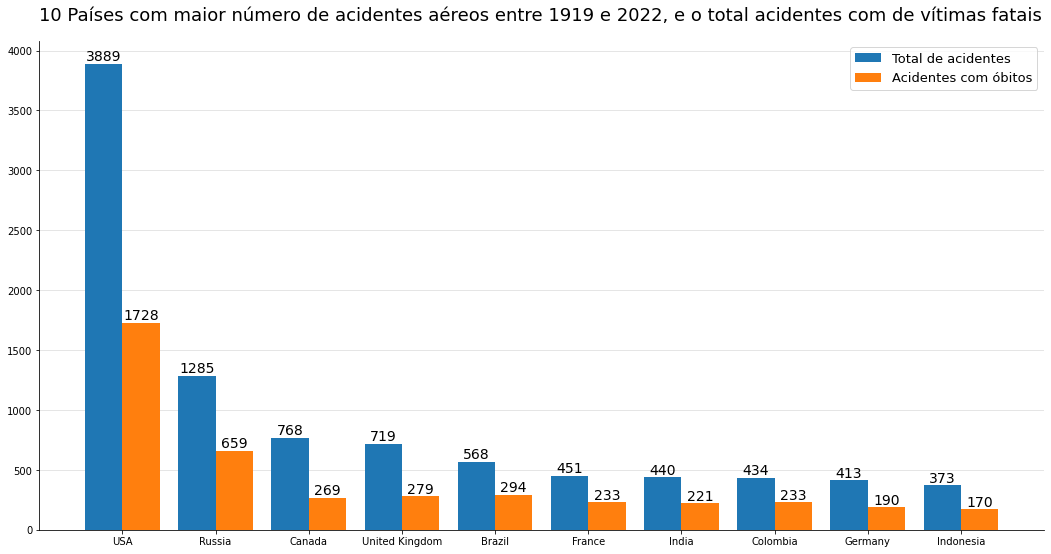

In [33]:
fig, ax = plt.subplots(figsize=(18,9))

p1 = ax.bar(data=df_3['Total de acidentes'].head(10), x=df_3.head(10).index, height=df_3['Total de acidentes'].head(10).values, width=-0.4, align='edge')
p2 = ax.bar(data=df_3['Acidentes com óbitos'].head(10), x=df_3.head(10).index, height=df_3['Acidentes com óbitos'].head(10).values, width=0.4, align='edge')

ax.bar_label(p1, label_type='edge', fontsize=14)
ax.bar_label(p2, label_type='edge', fontsize=14)
ax.legend(['Total de acidentes','Acidentes com óbitos'], loc='upper right', fontsize=13)
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.4)
ax.set_title('10 Países com maior número de acidentes aéreos entre 1919 e 2022, e o total acidentes com de vítimas fatais', fontsize=18, loc='left', pad=20)
sns.despine()
print()
plt.show()

In [34]:
# Verificando os quais são os 20 recordistas em acidentes aéreos
df_3.head(20).index

Index(['USA', 'Russia', 'Canada', 'United Kingdom', 'Brazil', 'France',
       'India', 'Colombia', 'Germany', 'Indonesia', 'Mexico', 'Italy',
       'Vietnam', 'Australia', 'China', 'Argentina', 'Japan', 'Cuba',
       'Philippines', 'Congo (former Zaire)'],
      dtype='object')

In [35]:
# Modificando o nome do 20º recordista
df_3.index.values[19] = 'Congo'
df_3.index[19]

'Congo'

*Gráfico exibe o total de acidentes dos 20 recordistas e quantos destes acidentes tiveram óbitos*

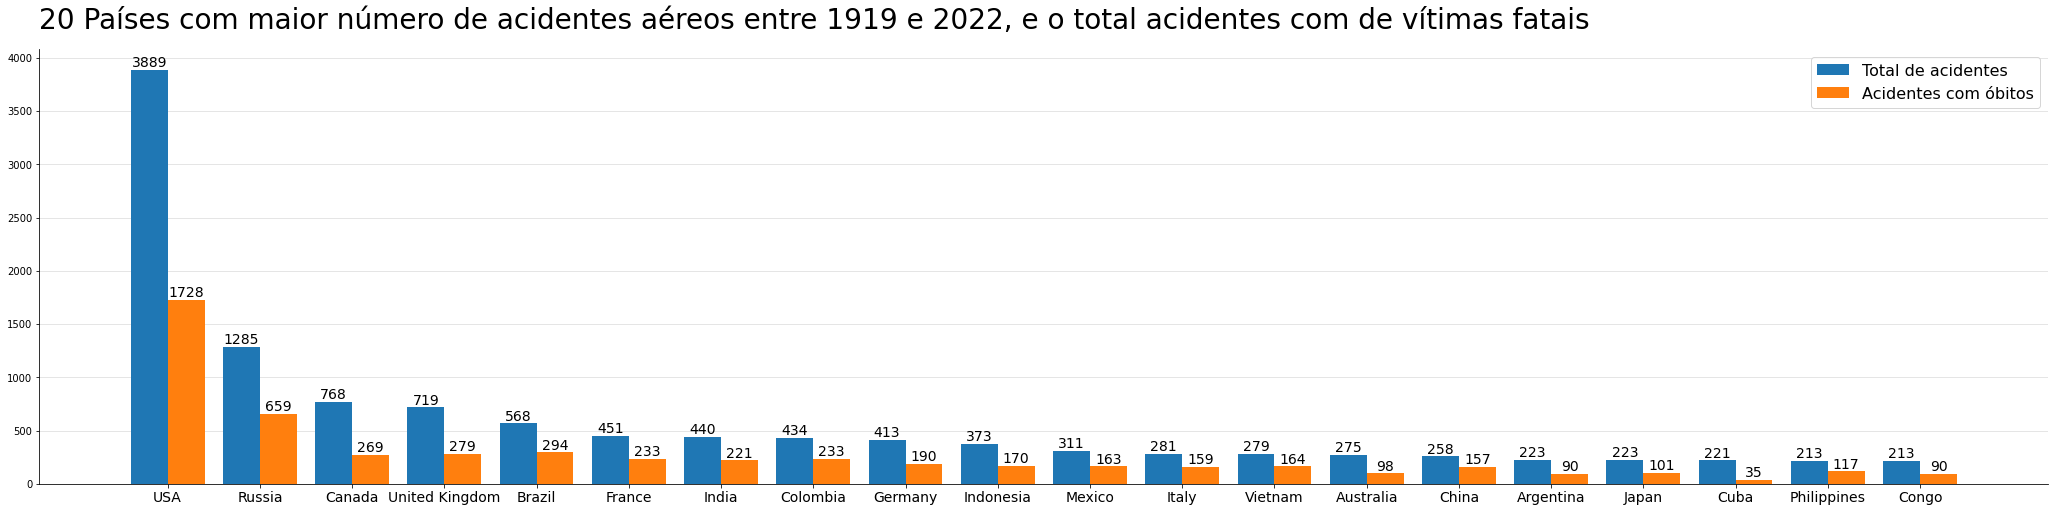

In [36]:
fig, ax = plt.subplots(figsize=(36,8))

p1 = ax.bar(data=df_3['Total de acidentes'].head(20), x=df_3.head(20).index, height=df_3['Total de acidentes'].head(20).values, width=-0.4, align='edge')
p2 = ax.bar(data=df_3['Acidentes com óbitos'].head(20), x=df_3.head(20).index, height=df_3['Acidentes com óbitos'].head(20).values, width=0.4, align='edge')

ax.bar_label(p1, label_type='edge', fontsize=14)
ax.bar_label(p2, label_type='edge', fontsize=14)
plt.xticks(fontsize=14)
ax.legend(['Total de acidentes','Acidentes com óbitos'], loc='upper right', fontsize=16)
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.4)
ax.set_title('20 Países com maior número de acidentes aéreos entre 1919 e 2022, e o total acidentes com de vítimas fatais', fontsize=28, loc='left', pad=20)
sns.despine()
print()
plt.show()